In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
train_dir = './dataset/train/'
test_dir = './dataset/test/'

BATCH_SIZE = 32
IMG_SIZE = (224,224)

In [3]:
train_data = image_dataset_from_directory(train_dir,
                                          seed=42,
                                          batch_size=BATCH_SIZE,
                                          label_mode='categorical',
                                          image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                          seed=42,
                                          batch_size=BATCH_SIZE,
                                          label_mode='categorical',
                                          image_size=IMG_SIZE)

Found 1248 files belonging to 26 classes.
Found 1247 files belonging to 26 classes.


In [4]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
],name='data_augmentation')

In [5]:
checkpoint_path = "./weights/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy'                                                             
                                                        )

In [6]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3),name="Input Layer")
z = data_augmentation(inputs)
z = base_model(z,training=False)
z = layers.GlobalAveragePooling2D()(z)
outputs = layers.Dense(len(train_data.class_names),activation="softmax",name="output")(z)
model = tf.keras.Model(inputs,outputs)

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(train_data,epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15 * len(test_data)),
          callbacks=[checkpoint_callback]
         )

Epoch 1/5
 6/39 [===>..........................] - ETA: 15s - loss: 3.3109 - accuracy: 0.0260 

2022-08-10 20:59:27.553591: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-10 20:59:27.553622: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 8/39 [=====>........................] - ETA: 16s - loss: 3.3208 - accuracy: 0.0312

2022-08-10 20:59:28.806687: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-10 20:59:28.806719: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/39 [========>.....................] - ETA: 14s - loss: 3.2929 - accuracy: 0.0469

2022-08-10 20:59:30.949457: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-10 20:59:30.949487: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


15/39 [==========>...................] - ETA: 12s - loss: 3.2769 - accuracy: 0.0625

2022-08-10 20:59:32.438761: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-10 20:59:32.438793: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


19/39 [=============>................] - ETA: 10s - loss: 3.2418 - accuracy: 0.0757

2022-08-10 20:59:34.384737: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-10 20:59:34.384764: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.53GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


39/39 [==============================] - 23s 468ms/step - loss: 3.1230 - accuracy: 0.1018 - val_loss: 3.0001 - val_accuracy: 0.1375
Epoch 2/5
39/39 [==============================] - 14s 348ms/step - loss: 2.7417 - accuracy: 0.2179 - val_loss: 2.6997 - val_accuracy: 0.2000
Epoch 3/5
39/39 [==============================] - 13s 329ms/step - loss: 2.4992 - accuracy: 0.2869 - val_loss: 2.5071 - val_accuracy: 0.2313
Epoch 4/5
39/39 [==============================] - 13s 323ms/step - loss: 2.3369 - accuracy: 0.3438 - val_loss: 2.3330 - val_accuracy: 0.3187
Epoch 5/5
39/39 [==============================] - 11s 266ms/step - loss: 2.1826 - accuracy: 0.4103 - val_loss: 2.1525 - val_accuracy: 0.3875


In [7]:
base_model.trainable = True

for layers in base_model.layers[:-20]:
    layers.trainable = False

    

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_fine_tune = model.fit(train_data,initial_epoch=history.epoch[-1],epochs=10,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=int(0.15 * len(test_data)),callbacks=[checkpoint_callback]
                              
                             
         )

Epoch 5/10
39/39 [==============================] - 17s 338ms/step - loss: 1.7483 - accuracy: 0.4535 - val_loss: 1.3008 - val_accuracy: 0.6313
Epoch 6/10
39/39 [==============================] - 12s 294ms/step - loss: 1.0996 - accuracy: 0.6514 - val_loss: 0.6747 - val_accuracy: 0.7812
Epoch 7/10
39/39 [==============================] - 9s 241ms/step - loss: 0.7902 - accuracy: 0.7420 - val_loss: 0.4467 - val_accuracy: 0.8438
Epoch 8/10
39/39 [==============================] - 10s 244ms/step - loss: 0.6210 - accuracy: 0.7853 - val_loss: 0.3154 - val_accuracy: 0.9062
Epoch 9/10
39/39 [==============================] - 9s 226ms/step - loss: 0.5135 - accuracy: 0.8149 - val_loss: 0.3885 - val_accuracy: 0.8625
Epoch 10/10
39/39 [==============================] - 9s 242ms/step - loss: 0.3699 - accuracy: 0.8870 - val_loss: 0.2087 - val_accuracy: 0.9125


In [16]:
def pred_and_plot(model,filename, train_data):
    import matplotlib.pyplot as plt
    img = load_and_prep_img(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    if(len(pred[0]) > 1):
        pred_class = train_data.class_names[tf.argmax(pred[0])]
    else:
        pred_class = train_data.class_names[int(tf.round(pred[0]))]
        
    
    
    
    plt.imshow(img.astype('uint8'))
    plt.title(f"Prediction: {pred_class}")
    return pred_class

1/1 [==============================] - 0s 25ms/step


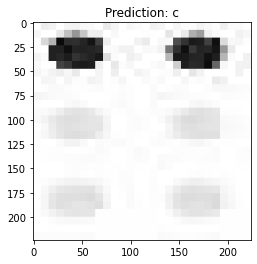

In [17]:
class_name = pred_and_plot(model,'./dataset/test/c/c1.JPG12dim.jpg',train_data)